In [3]:
# fore data manipulation
import numpy as np
import pandas as pd

import sys

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# to display plot in the notebook
%matplotlib inline

# for splitting data
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
# checking the versions of the libraries
libraries = [['Numpy', np],['Pandas', pd],['Matplotlib', matplotlib],['seaborn', sns],['sklearn', sklearn]]
for i in libraries:
    print('{0} Version: {1}'.format(i[0], i[1].__version__))
print("Python:", sys.version)

Numpy Version: 1.14.2
Pandas Version: 0.20.3
Matplotlib Version: 2.1.0
seaborn Version: 0.8.0
sklearn Version: 0.19.1
Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


In [40]:
# reading the test and train data

X_train = pd.read_csv('X_train.csv' , encoding='ISO-8859-1')
y_train = pd.read_csv('y_train.csv', encoding='ISO-8859-1', header=None)
X_test = pd.read_csv('X_test.csv', encoding='ISO-8859-1')
y_test = pd.read_csv('y_test.csv', encoding='ISO-8859-1', header=None)

In [41]:
print(X_train.shape)
print(y_train.shape)

X_train.head()

(7568, 143)
(7568, 1)


,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),...,Category__Office.2,Category__Other.1,Category__Others.2,Category__Residence Hall/Dormitory.1,Category__3,Category__4,Category__5,Category__6,Category__7,Category__Others.3
0,4334,2669751,104000.0,1960,1,100,85.6,6.9,0.0,227600.0,...,0,0,0,0,0,0,1,0,0,0
1,870,2679476,136070.0,1963,1,100,91.1,5.4,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,6345,2787415,107106.0,1924,2,100,56.9,3.3,0.1,665384.9,...,0,0,0,0,0,1,0,0,0,0
3,9280,2658110,57786.0,1937,1,100,68.3,3.5,0.6,3379600.3,...,0,0,0,0,0,1,0,0,0,0
4,13011,5833061,74532.0,1931,1,100,14.6,3.1,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [42]:
y_train.head()

,0
0,35.0
1,37.0
2,98.0
3,99.0
4,100.0


In [43]:
print(X_test.shape)
print(y_test.shape)

X_test.head()

(1893, 143)
(1893, 1)


,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),...,Category__Office.2,Category__Other.1,Category__Others.2,Category__Residence Hall/Dormitory.1,Category__3,Category__4,Category__5,Category__6,Category__7,Category__Others.3
0,10220,5729364,123910.0,1988,6,100,106.8,8.3,0.9,9790569.3,...,0,0,0,0,0,1,0,0,0,0
1,12891,4954012,266316.0,1990,1,100,76.5,7.2,0.6,13466199.8,...,0,0,0,0,0,1,0,0,0,0
2,7434,3533538,54365.0,2012,1,100,68.4,7.5,0.5,2320206.6,...,0,0,0,0,1,0,0,0,0,0
3,9044,5832435,60720.0,1938,1,100,63.3,NaN,0.7,4164600.3,...,0,0,0,0,0,1,0,0,0,0
4,9336,2745630,140595.0,1940,1,100,68.1,4.0,0.5,7088100.3,...,0,0,0,0,0,1,0,0,0,0


## Imputing Missing Values

In [44]:
# statistics for the missing data 
def summary_of_missing_data(df):
    
    # null value count for each column
    null_cols = df.isnull().sum()
    
    # % null values for each column
    null_percent = df.isnull().sum()*100 / len(df)
    
    # result table
    table = pd.concat([null_cols, null_percent], axis = 1)
    
    # column renaming
    table.columns = ['Null value count', '% of null values']
    
    # removing columns with 0 null values
    table = table[table['Null value count'] != 0]
    
    # Sorting values
    table = table.sort_values(by = ['% of null values'], ascending = False)
    
    print('Number of columns with missing values {}'.format(table.shape[0]))
    
    return table

In [33]:
summary_of_missing_data(X_train)

Number of columns with missing values 10


,Null value count,% of null values
Water Use (All Water Sources) (kgal),2450,32.373150
Latitude,1444,19.080338
Longitude,1444,19.080338
Community Board,1444,19.080338
Census Tract,1444,19.080338
Weather Normalized Site Natural Gas Intensity (therms/ft²),1114,14.719873
Natural Gas Use (kBtu),794,10.491543
Weather Normalized Site Electricity Intensity (kWh/ft²),382,5.047569
Electricity Use - Grid Purchase (kBtu),62,0.819239
DOF Gross Floor Area,37,0.488901


In [45]:
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

imputer = Imputer(strategy = 'median')

# training on train data
imputer.fit(X_train)

# transform on both test and train
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

## Scaling of Features

Scalling is not required for tree based models. But, it will be usefull when you are using models which depend on distance metrics such as KNN and SVM. and there is no harm if you use scaled data for tree based models also.


In [35]:
scaler = MinMaxScaler()

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# convertion Y to 1-D array
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

## Model Building

In [37]:
# function to build, predict and find mean abs error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# fit and evaluate models
def model_builder(model):
    
    # training the model
    model.fit(X_train, y_train)
    
    # predict y
    y_pred = model.predict(X_test)
    
    # mean abs error
    MAE = mae(y_test, y_pred)
    
    return MAE
    

In [70]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [78]:
lr = LinearRegression()
lr_mae = model_builder(lr)

print('LinearRegression MAE is {}'.format(lr_mae))

LinearRegression MAE is 13.82972007955064


In [52]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = model_builder(svm)
print("SVM's MAE is " + str(svm_mae) )

SVM's MAE is 25.20905230855039


In [54]:
random_forest = RandomForestRegressor(random_state=0)
random_forest_mae = model_builder(random_forest)

print("RandomForestRegressor's MAE is " + str(random_forest_mae) )

RandomForestRegressor's MAE is 9.844690966719494


In [55]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = model_builder(gradient_boosted)

print("GradientBoostingRegressor's MAE is " + str(gradient_boosted_mae) )

GradientBoostingRegressor's MAE is 9.748158061158941


In [65]:
knn = KNeighborsRegressor(n_neighbors=8)
knn_mae = model_builder(knn)

print("KNeighborsRegressor's MAE is " + str(knn_mae) )

KNeighborsRegressor's MAE is 22.54325145272055


In [69]:
# it is clear that applying regularization to the linear regression has no increase in MAE 
alpha = [0.01, 0.1, 1, 10]

for i in alpha:
    ls = Lasso(alpha = i)
    ls_mae = model_builder(ls)
    print(i, ls_mae)

0.01 13.912180958621299
0.1 14.105368569871763
1 14.85187098260886
10 15.456103843650135


In [74]:
ls = Lasso(alpha = 0.01)
ls_mae = model_builder(ls)

print("Lasso's MAE is " + str(ls_mae) )

Lasso's MAE is 13.912180958621299


In [72]:

adbr = AdaBoostRegressor()
adbr_mae = model_builder(adbr)

print("AdaBoostRegressor's MAE is " + str(adbr_mae) )

AdaBoostRegressor's MAE is 17.11621959987934


In [77]:
MAE_models

,MAE,model
0,0 13.82972 dtype: float64,LinearRegression
1,25.2091,SVR
2,9.84469,RandomForestRegressor
3,9.74816,GradientBoostingRegressor
4,22.5433,KNeighborsRegressor
5,13.9122,Lasso
6,17.1162,AdaBoostRegressor


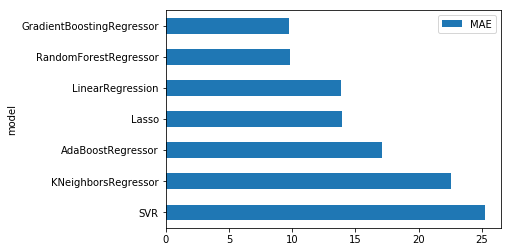

In [79]:
MAE_models = pd.DataFrame({'model': ['LinearRegression','SVR', 'RandomForestRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'Lasso', 'AdaBoostRegressor'],
                          'MAE': [lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae, ls_mae, adbr_mae]})
MAE_models.sort_values('MAE', ascending = False).plot(x = 'model', y = 'MAE',
                                                     kind = 'barh')

From the above model results, we can come to following conclusions:

- As Lasso results are higher then linear regression we can eliminate ridge, elastic net models.
- SVM and KNN are doing worse than baseline. so it will be best not to choose these models.
- By far we can see random forest and gradient boosting are the models with lowest MAE. So we will start tunning these models.

## Model Optimization